In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from pyclustertend import hopkins
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
cnt = pd.read_csv("countries.csv")

In [4]:
cnt.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581


In [5]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.0+ KB


In [6]:
cnt.shape

(190, 10)

In [7]:
happy_score_cnt = pd.read_csv("happiness_scores.csv")

In [8]:
happy_score_cnt.shape

(149, 2)

In [9]:
cnt = pd.merge(cnt, happy_score_cnt, on="location", how="left")

In [10]:
cnt.head()

,location,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
0,Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
1,Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
2,Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
3,Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
4,Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


In [11]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 190 non-null    object 
 1   population               190 non-null    int64  
 2   population_density       186 non-null    float64
 3   median_age               181 non-null    float64
 4   aged_65_older            179 non-null    float64
 5   aged_70_older            180 non-null    float64
 6   gdp_per_capita           182 non-null    float64
 7   extreme_poverty          124 non-null    float64
 8   life_expectancy          189 non-null    float64
 9   human_development_index  183 non-null    float64
 10  happiness_score          149 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 17.8+ KB


In [12]:
cnt.describe()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
count,1.900000e+02,186.000000,181.000000,179.000000,180.000000,182.000000,124.000000,189.000000,183.000000,149.000000
mean,8.183077e+07,341.658210,30.204972,8.590022,5.436161,18439.706637,13.916129,72.862011,0.708869,5.472221
std,5.819950e+08,1612.572496,9.171031,6.198639,4.225454,19589.091950,20.311975,7.584835,0.154410,1.125246
min,8.090000e+02,1.980000,15.100000,1.144000,0.526000,661.240000,0.100000,53.280000,0.354000,2.567000
25%,2.367885e+06,35.972500,21.700000,3.421500,2.033500,3924.303000,0.600000,67.270000,0.588500,4.677000
50%,9.493482e+06,82.464000,29.400000,6.211000,3.541500,11822.138500,2.350000,74.250000,0.736000,5.515000
75%,3.076120e+07,208.157000,38.700000,14.053000,8.651750,26069.050500,21.675000,77.970000,0.823000,6.258000
max,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,86.750000,0.953000,7.809000


In [13]:
cnt.set_index("location", inplace=True)

In [14]:
cnt.head()

,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,,,,
Afghanistan,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,64.83,0.498,2.567
Albania,2877800,104.871,38.0,13.188,8.643,11803.431,1.1,78.57,0.785,4.883
Algeria,43851043,17.348,29.1,6.211,3.857,13913.839,0.5,76.88,0.754,5.005
Andorra,77265,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.858,NaN
Angola,32866268,23.890,16.8,2.405,1.362,5819.495,NaN,61.15,0.581,NaN


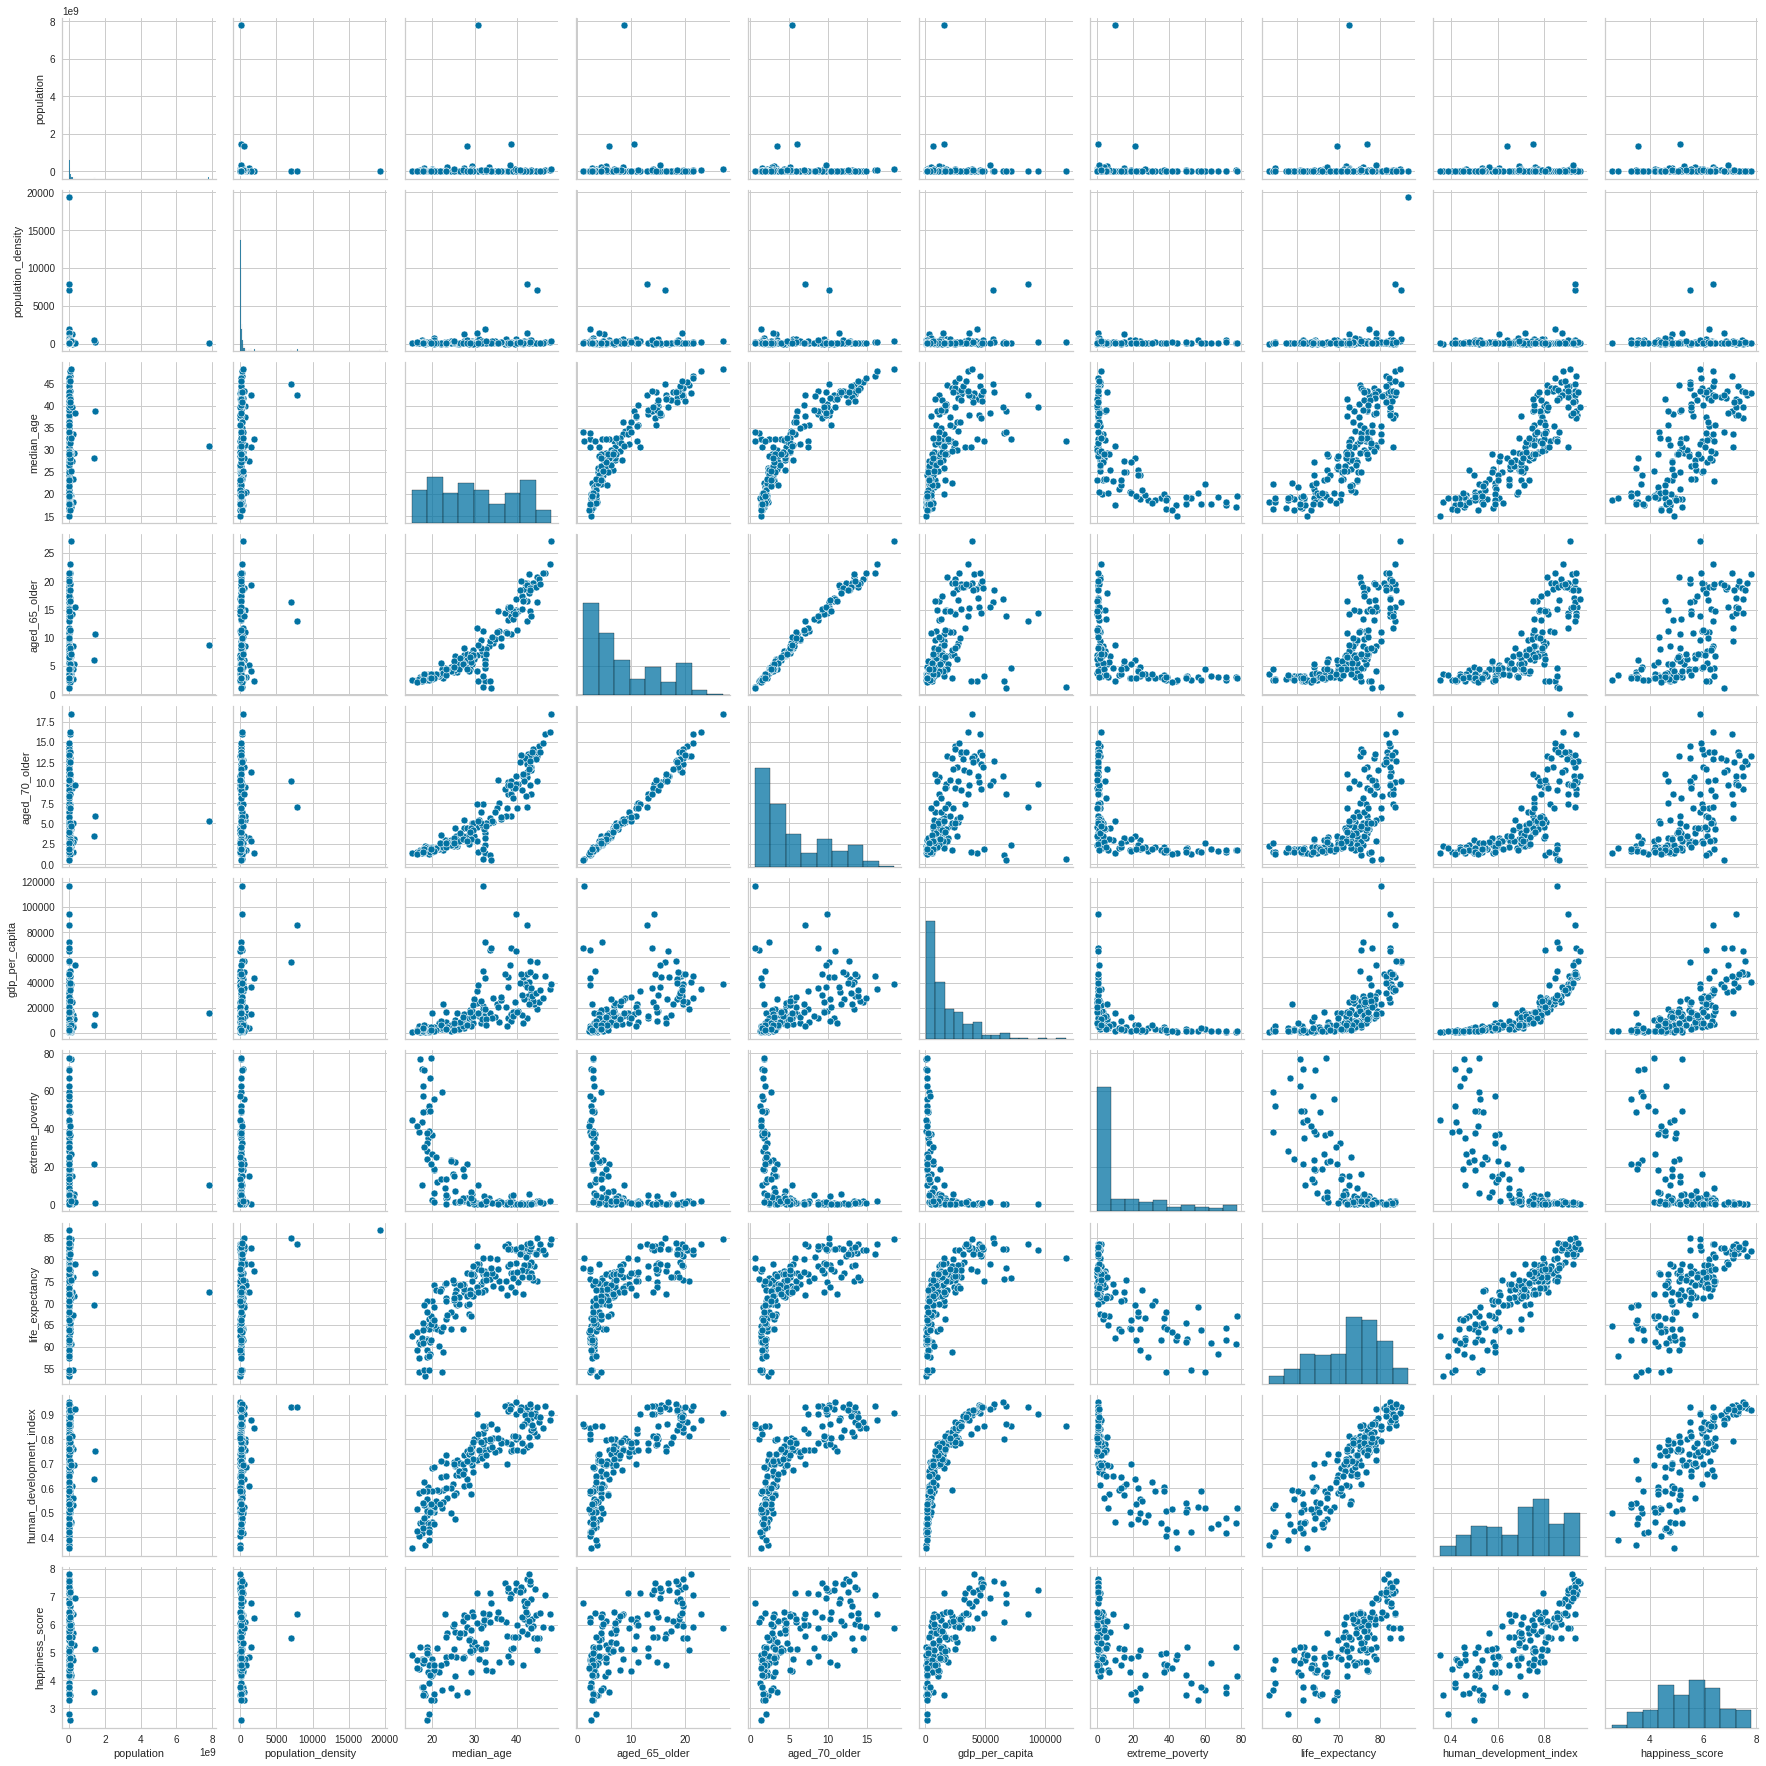

In [15]:
sns.pairplot(cnt)

In [16]:
cnt_new = cnt[["median_age", "aged_65_older", "gdp_per_capita",
               "extreme_poverty", "life_expectancy",
               "human_development_index", "happiness_score"]]

In [17]:
cnt_new.sample(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Malawi,18.1,2.979,1095.042,71.4,64.26,0.477,3.538
Italy,47.9,23.021,35220.084,2.0,83.51,0.880,6.387
Chad,16.7,2.486,1768.153,38.4,54.24,0.404,4.423
South Africa,27.3,5.344,12294.876,18.9,64.13,0.699,4.814
Spain,45.5,19.436,34272.360,1.0,83.56,0.891,6.401
Cameroon,18.8,3.165,3364.926,23.8,59.29,0.556,5.085
Denmark,42.3,19.677,46682.515,0.2,80.90,0.929,7.646
Ecuador,28.1,7.104,10581.936,3.6,77.01,0.752,5.925
Thailand,40.1,11.373,16277.671,0.1,77.15,0.755,5.999


In [18]:
cnt_new.isnull().sum()

median_age                  9
aged_65_older              11
gdp_per_capita              8
extreme_poverty            66
life_expectancy             1
human_development_index     7
happiness_score            41
dtype: int64

In [19]:
cnt_new.loc["World"]

median_age                    30.900
aged_65_older                  8.696
gdp_per_capita             15469.207
extreme_poverty               10.000
life_expectancy               72.580
human_development_index          NaN
happiness_score                  NaN
Name: World, dtype: float64

In [20]:
for col in ["median_age", "aged_65_older", "life_expectancy"]:
    cnt_new[col].fillna(cnt_new[col]["World"], inplace=True)

In [21]:
cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     7
happiness_score            41
dtype: int64

In [22]:
cnt_new[cnt_new["extreme_poverty"].isnull()].sample(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score
location,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567
Taiwan,42.2,8.696,NaN,NaN,80.46,NaN,6.455
Belarus,40.3,14.799,17167.967,NaN,74.79,0.808,5.540
Qatar,31.9,1.307,116935.600,NaN,80.23,0.856,NaN
South Sudan,19.2,3.441,1569.888,NaN,57.85,0.388,2.817
Cambodia,25.6,4.412,3645.070,NaN,69.82,0.582,4.848
Bahamas,34.3,8.996,27717.847,NaN,73.92,0.807,NaN
Maldives,30.6,4.120,15183.616,NaN,78.92,0.717,5.198
Azerbaijan,32.4,6.018,15847.419,NaN,73.00,0.757,5.165


In [23]:
cnt_new["human_development_index"].fillna(cnt_new["human_development_index"].mean(), inplace=True)

In [24]:
cnt_hdi = cnt_new["human_development_index"].values.reshape(-1, 1)

In [25]:
kmeans = KMeans()

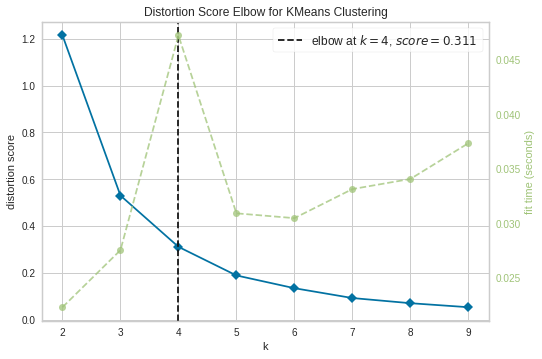

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(cnt_hdi)
visualizer.poof()

In [27]:
kmeans_model = KMeans(n_clusters=4).fit(cnt_hdi)

In [28]:
cnt_hdi_pred = kmeans_model.predict(cnt_hdi)

In [29]:
np.unique(cnt_hdi_pred, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([31, 77, 36, 46]))

In [30]:
cnt_new["hdi_clusters"] = cnt_hdi_pred

In [31]:
cnt_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567,2
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883,1
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005,1
Andorra,30.9,8.696,NaN,NaN,83.73,0.858,NaN,3
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,NaN,0
Antigua and Barbuda,32.1,6.933,21490.943,NaN,77.02,0.780,NaN,1
Argentina,31.9,11.198,18933.907,0.6,76.67,0.825,5.975,3
Armenia,35.7,11.232,8787.580,1.8,75.09,0.755,4.677,1
Australia,37.9,15.504,44648.710,0.5,83.44,0.939,7.223,3


In [32]:
hdi_avg_hs = cnt_new.groupby("hdi_clusters")["happiness_score"].mean()

In [33]:
hdi_avg_hs

hdi_clusters
0    5.051238
1    5.446964
2    4.151667
3    6.659643
Name: happiness_score, dtype: float64

In [34]:
cnt_new["happiness_score"] = cnt_new.groupby("hdi_clusters")["happiness_score"].apply(lambda x: x.fillna(x.mean()))

In [35]:
cnt_new.head(10)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.987,NaN,64.83,0.498,2.567000,2
Albania,38.0,13.188,11803.431,1.1,78.57,0.785,4.883000,1
Algeria,29.1,6.211,13913.839,0.5,76.88,0.754,5.005000,1
Andorra,30.9,8.696,NaN,NaN,83.73,0.858,6.659643,3
Angola,16.8,2.405,5819.495,NaN,61.15,0.581,5.051238,0
Antigua and Barbuda,32.1,6.933,21490.943,NaN,77.02,0.780,5.446964,1
Argentina,31.9,11.198,18933.907,0.6,76.67,0.825,5.975000,3
Armenia,35.7,11.232,8787.580,1.8,75.09,0.755,4.677000,1
Australia,37.9,15.504,44648.710,0.5,83.44,0.939,7.223000,3


In [36]:
cnt_new.isnull().sum()

median_age                  0
aged_65_older               0
gdp_per_capita              8
extreme_poverty            66
life_expectancy             0
human_development_index     0
happiness_score             0
hdi_clusters                0
dtype: int64

In [37]:
cnt_new["gdp_per_capita"] = cnt_new.groupby("hdi_clusters")["gdp_per_capita"].apply(lambda x: x.fillna(x.mean()))
cnt_new["gdp_per_capita"] = cnt_new["gdp_per_capita"].fillna(cnt_new["gdp_per_capita"].mean())

In [38]:
cnt_new.head()

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,hdi_clusters
location,,,,,,,,
Afghanistan,18.6,2.581,1803.9870,NaN,64.83,0.498,2.567000,2
Albania,38.0,13.188,11803.4310,1.1,78.57,0.785,4.883000,1
Algeria,29.1,6.211,13913.8390,0.5,76.88,0.754,5.005000,1
Andorra,30.9,8.696,44472.9145,NaN,83.73,0.858,6.659643,3
Angola,16.8,2.405,5819.4950,NaN,61.15,0.581,5.051238,0


In [39]:
cnt_new["extreme_poverty"] = cnt_new.groupby("hdi_clusters")["extreme_poverty"].apply(lambda x: x.fillna(x.mean()))
cnt_new["extreme_poverty"] = cnt_new["extreme_poverty"].fillna(cnt_new["extreme_poverty"].mean())

In [40]:
cnt_new.isnull().sum()

median_age                 0
aged_65_older              0
gdp_per_capita             0
extreme_poverty            0
life_expectancy            0
human_development_index    0
happiness_score            0
hdi_clusters               0
dtype: int64

In [43]:
cnt_new1 = cnt_new.drop("hdi_clusters", axis=1)

In [48]:
hopkins(cnt_new1, cnt_new1.shape[0])

0.16660511944637876

In [49]:
hopkins(scale(cnt_new1), cnt_new1.shape[0])

0.14545962892460682

In [50]:
kmeans = KMeans()

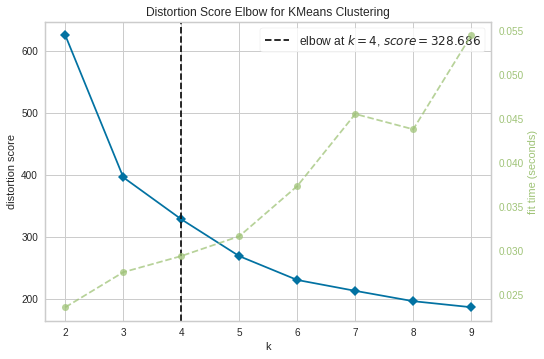

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(scale(cnt_new1))
visualizer.poof()

In [53]:
scaler = StandardScaler()

In [54]:
cnt_new1_scaled = scaler.fit_transform(cnt_new1)

In [55]:
kmeans_model = KMeans(n_clusters=4, random_state=18).fit(cnt_new1_scaled)

In [56]:
cnt_new1_scaled_pred = kmeans_model.predict(cnt_new1_scaled)

In [57]:
print(cnt_new1_scaled_pred)

[1 0 0 2 3 0 0 0 2 2 0 0 0 3 0 0 2 3 1 3 3 0 3 0 2 0 1 1 3 1 2 3 1 1 0 0 0
 1 1 0 1 2 0 2 1 2 1 0 0 0 3 0 3 1 2 3 1 3 2 2 3 3 0 2 3 2 0 3 1 1 3 1 3 2
 2 2 3 3 0 3 2 2 2 0 2 3 0 1 0 0 3 3 2 0 1 1 3 2 2 2 1 1 0 0 1 2 0 3 0 0 0
 0 3 0 0 1 3 3 3 2 2 3 1 1 0 2 0 3 3 0 3 3 0 3 2 2 2 2 0 1 0 0 0 3 0 3 0 1
 0 0 1 2 2 2 3 3 3 2 1 2 0 1 0 2 2 1 0 3 1 0 3 1 0 0 0 1 0 2 2 2 0 3 3 0 0
 0 0 1 1 1]


In [58]:
np.unique(cnt_new1_scaled_pred, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([64, 38, 43, 45]))

In [61]:
silhouette_score(cnt_new1_scaled, cnt_new1_scaled_pred)

0.31539196609895687

In [62]:
cnt_new1["KMeans_clusters"] = cnt_new1_scaled_pred

In [64]:
cnt_new1.sample(15)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,KMeans_clusters
location,,,,,,,,
Slovakia,41.2,15.070,30155.1520,0.700000,77.54,0.855,6.281000,2
Malaysia,29.9,6.293,26808.1640,0.100000,76.16,0.802,5.384000,0
Senegal,18.7,3.008,2470.5800,38.000000,67.94,0.505,4.981000,1
Lesotho,22.2,4.506,2851.1530,59.600000,54.33,0.520,3.653000,1
Timor,18.0,3.556,6570.1020,30.300000,69.50,0.625,5.051238,3
Benin,18.8,3.244,2064.2360,49.600000,61.77,0.515,5.216000,1
United States,38.3,15.413,54225.4460,1.200000,78.86,0.924,6.940000,2
Latvia,43.9,19.754,25063.8460,0.700000,75.29,0.847,5.950000,2
Eritrea,19.3,3.607,1510.4590,42.817857,66.32,0.440,4.151667,1


In [67]:
cnt_new1[cnt_new1["KMeans_clusters"] == 2].tail(20)

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,KMeans_clusters
location,,,,,,,,
Lithuania,43.5,19.002,29524.265,0.700000,75.93,0.858,6.215000,2
Luxembourg,39.7,14.312,94277.965,0.200000,82.25,0.904,7.238000,2
Malta,42.4,19.426,36513.323,0.200000,82.53,0.878,6.773000,2
Netherlands,43.2,18.779,48472.545,0.607407,82.28,0.931,7.449000,2
New Zealand,37.9,15.322,36085.843,0.607407,82.29,0.917,7.300000,2
Norway,39.7,16.821,64800.057,0.200000,82.40,0.953,7.488000,2
Poland,41.8,16.763,27216.445,0.607407,78.73,0.865,6.186000,2
Portugal,46.2,21.502,27936.896,0.500000,82.05,0.847,5.911000,2
Qatar,31.9,1.307,116935.600,0.607407,80.23,0.856,6.659643,2


In [70]:
# Let's try hierarchical clustering now.

In [72]:
linked = linkage(cnt_new1_scaled, "ward")

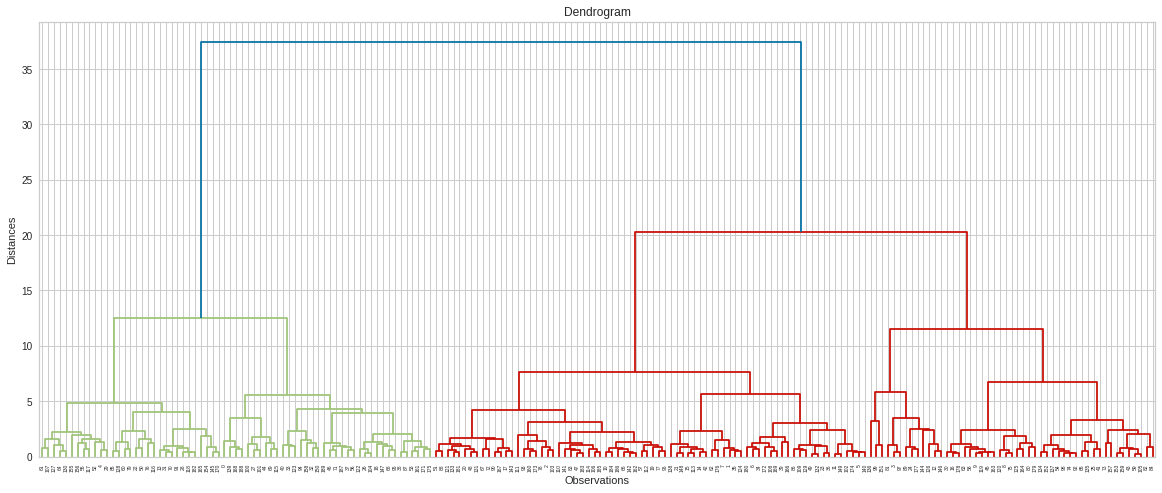

In [73]:
plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(linked)
plt.show()

In [74]:
linked_complete = linkage(cnt_new1_scaled, "ward")

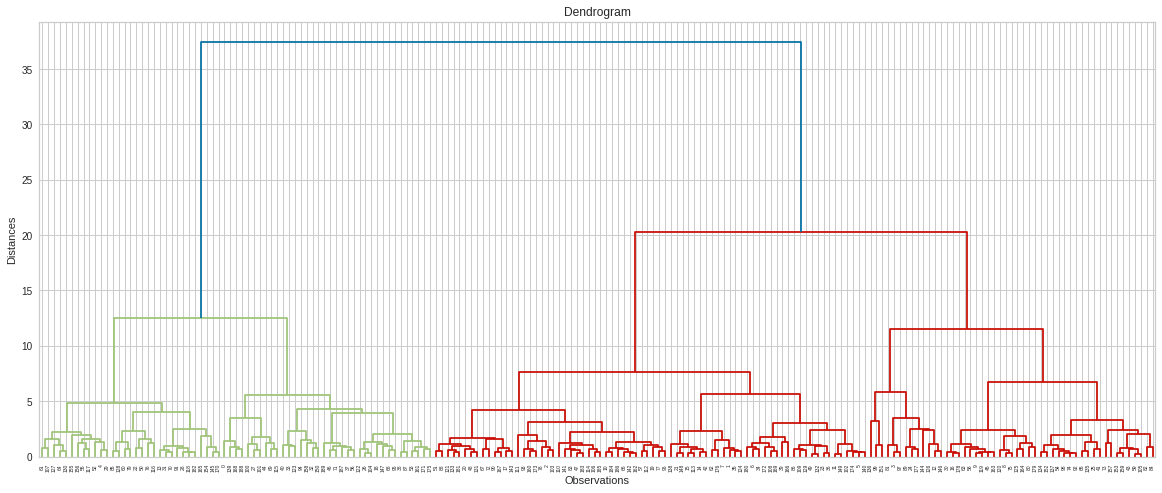

In [75]:
plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distances")
dendrogram(linked_complete)
plt.show()

In [92]:
Hr_model = AgglomerativeClustering(n_clusters=5)
cnt_new1_scaled_pred_hr = Hr_model.fit_predict(cnt_new1_scaled)

In [93]:
np.unique(cnt_new1_scaled_pred_hr, return_counts=True)

(array([0, 1, 2, 3, 4]), array([74, 13, 36, 31, 36]))

In [94]:
silhouette_score(cnt_new1_scaled, cnt_new1_scaled_pred_hr)

0.3309364070116029

In [95]:
cnt_new1["Hr_predicted_clusters"] = Hr_model.labels_

In [103]:
cnt_new1[cnt_new1["Hr_predicted_clusters"] == 2]

,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,happiness_score,KMeans_clusters,Hr_predicted_clusters
location,,,,,,,,,
Australia,37.9,15.504,44648.710,0.500000,83.44,0.939,7.223,2,2
Austria,44.4,19.202,45436.686,0.700000,81.54,0.908,7.294,2,2
Belgium,41.8,18.571,42658.576,0.200000,81.63,0.916,6.864,2,2
Bulgaria,44.7,20.801,18563.307,1.500000,75.05,0.813,5.102,0,2
Canada,41.4,16.984,44017.591,0.500000,82.43,0.926,7.232,2,2
Croatia,44.0,19.724,22669.797,0.700000,78.49,0.831,5.505,2,2
Czechia,43.3,19.027,32605.906,0.607407,79.38,0.888,6.911,2,2
Denmark,42.3,19.677,46682.515,0.200000,80.90,0.929,7.646,2,2
Estonia,42.7,19.452,29481.252,0.500000,78.74,0.871,6.022,2,2


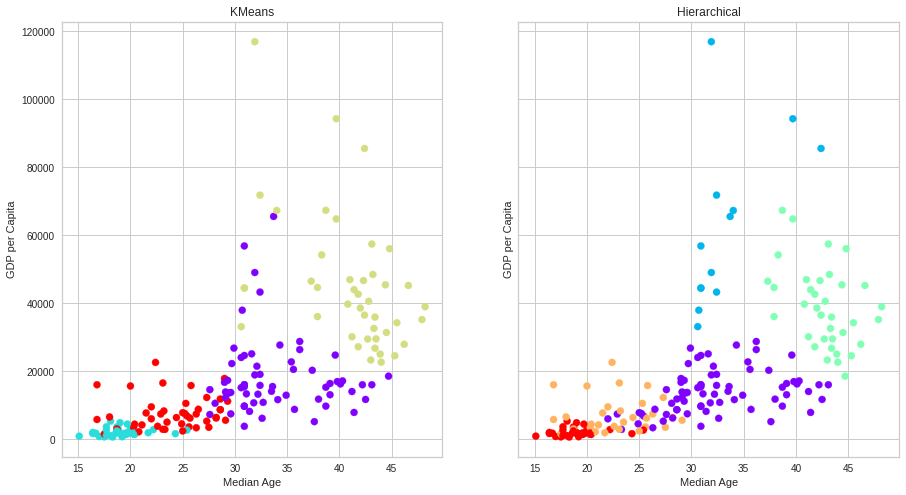

In [109]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

ax1.set_title("KMeans")
ax1.scatter(cnt_new1.iloc[:, 0], cnt_new1.iloc[:, 2], c=cnt_new1["KMeans_clusters"], s=50, cmap="rainbow")
ax1.set_xlabel("Median Age")
ax1.set_ylabel("GDP per Capita")

ax2.set_title("Hierarchical")
ax2.scatter(cnt_new1.iloc[:, 0], cnt_new1.iloc[:, 2], c=cnt_new1["Hr_predicted_clusters"], s=50, cmap="rainbow")
ax2.set_xlabel("Median Age")
ax2.set_ylabel("GDP per Capita")
plt.show()